In [6]:
%run input/Format.ipynb
import ROOT as root
from array import array
root.gErrorIgnoreLevel = root.kFatal
%jsroot on

In [7]:
Save_to_html = True

In [8]:
colors=[1,2,4,root.kGreen+2,root.kMagenta,root.kOrange+4,root.kGray,root.kCyan]
central_bins = [0,10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,100]
N_centr = int(len(central_bins)/2)
pt_boarders = [0.2,0.5,0.5,1.0,1.0,5.0]
file_path="input/"
file_names=["my-m_ee_Run14AuAu_81st_new_19831_785runs.root"] 
#m_ee_Run14AuAu_74th_new_19784_984runs m_ee_Run14AuAu_79th_new_19821_141runs m_ee_Run14AuAu_81st_new_19831_100runs
legend_names = ["new_old_x","new_old_y","dca_x","dca_y","vtx_res_x","vtx_res_y","vtx_res_x_reuse","vtx_res_y_reuse", "grid", "nhits","vtx"] 
hist_select_3D_names = ["hist_vtx_x","hist_vtx_y","hist_dca_x","hist_dca_y", "hist_vtx_delta_x","hist_vtx_delta_y", "hist_vtx_delta_x_reuse","hist_vtx_delta_y_reuse", "hist_vtx_grid_xy","hits_vtx_ntracks","hist_vtx_z","myvtx_hist_0"]

In [9]:
N_hists = len(hist_select_3D_names)

In [10]:
hists_read, hists_sim = [], []

for iFile in range(len(file_names)):
    #print(file_path+file_names[iFile])
    infile = root.TFile.Open(file_path+file_names[iFile], "read")
    hists_read_file = []
    for ihist in range(N_hists):
        hists_read_file.append(infile.Get(hist_select_3D_names[ihist]))
        hists_read_file[-1].SetDirectory(root.nullptr)
        hists_read_file[-1].SetName(hists_read_file[-1].GetName()+f"{iFile}")
    hists_read.append(hists_read_file)


infile.Close()

In [11]:
deltas_mean_x = []
deltas_error_x = []
deltas_mean_y = []
deltas_error_y = []
type_loc = 0
c0 = root.TCanvas(f"c0",f"c0",1450,900)
c0.Divide(3,3)
projz = hists_read[0][type_loc].ProjectionZ(f"projz{type_loc}")
legends = []
for icentr in range(N_centr):
    c0.cd(1+icentr)
    ibinz0 = projz.FindBin(central_bins[2*icentr+0])
    ibinz1 = projz.FindBin(central_bins[2*icentr+1])-1
    pos_proj = hists_read[iFile][type_loc].ProjectionX( hists_read[iFile][type_loc].GetName()+f"pos_proj_{icentr}",1,1000,ibinz0,ibinz1)
    y_proj = hists_read[iFile][type_loc+1].ProjectionX( hists_read[iFile][type_loc+1].GetName()+f"y_proj_{icentr}",1,1000,ibinz0,ibinz1)
    deltas_mean_x.append(pos_proj.GetStdDev()*10000)
    deltas_error_x.append(pos_proj.GetStdDevError()*10000)
    deltas_mean_y.append(y_proj.GetStdDev()*10000)
    deltas_error_y.append(y_proj.GetStdDevError()*10000)
    Format_Hist_total(pos_proj,title_x="dx",offset_y=1.1)
    pos_proj.Draw()
    legends.append(root.TLegend(0.2,0.6,0.65,0.95,f"{central_bins[2*icentr]}-{central_bins[2*icentr+1]}%"))
    legends[-1].AddEntry(pos_proj,legend_names[0],"l")
    Format_Legend(legends[-1])
    legends[-1].Draw()

c0.Draw()

In [12]:
print("Mean of dx")
for i in range(len(deltas_mean_x)):
    print(f"{central_bins[2*i]}-{central_bins[2*i+1]}%: {deltas_mean_x[i]:.3f} +/- {deltas_error_x[i]:.3f}")
    #print(f"{central_bins[2*i]}-{central_bins[2*i+1]}%: {deltas_mean[i]:.3f}")
    #print(f"{central_bins[2*i]}-{central_bins[2*i+1]}%: {deltas_mean[i]:.3f} +/- {deltas_error[i]:.3f}")

Mean of dx
0-10%: 42.892 +/- 0.006
10-20%: 49.873 +/- 0.007
20-30%: 59.888 +/- 0.009
30-40%: 72.877 +/- 0.014
40-50%: 92.270 +/- 0.022
50-60%: 98.226 +/- 0.032
60-70%: 70.903 +/- 0.033
70-80%: 99.922 +/- 0.074
80-100%: 137.468 +/- 0.178


In [13]:
n_points = len(deltas_mean_x)
x_vals = range(n_points)
x_vals_array = array('f', [float(x*10)+5 for x in x_vals])
y_vals_array = array('f', deltas_mean_x)
x_errs_array = array('f', [0.0]*n_points)
y_errs_array = array('f', deltas_error_x)


x1_vals_array = array('f', [float(x*10)+5 for x in x_vals])
y1_vals_array = array('f', deltas_mean_y)
x1_errs_array = array('f', [0.0]*n_points)
y1_errs_array = array('f', deltas_error_y)

g = root.TGraphErrors(n_points, x_vals_array, y_vals_array, x_errs_array, y_errs_array)
g.SetTitle("Mean and Error;Centrality bin;StdDev [#mum]")
g.SetMarkerStyle(20)
g.SetMarkerColor(root.kBlue)
g.SetLineColor(root.kBlue)
g.SetMinimum(0)


g1 = root.TGraphErrors(n_points, x1_vals_array, y1_vals_array, x1_errs_array, y1_errs_array)
g1.SetMarkerStyle(20)
g1.SetMarkerColor(root.kRed)
g1.SetLineColor(root.kRed)

c = root.TCanvas("c_deltas", "deltas_mean with error", 800, 600)
g.Draw("AP")    
g1.Draw("P")
c.Draw()

In [14]:
deltas_mean_x = []
deltas_error_x = []
deltas_mean_y = []
deltas_error_y = []
type_loc = 4
projz = hists_read[0][type_loc].ProjectionZ(f"projz{type_loc}")
for icentr in range(N_centr):
    c0.cd(1+icentr)
    ibinz0 = projz.FindBin(central_bins[2*icentr+0])
    ibinz1 = projz.FindBin(central_bins[2*icentr+1])-1
    pos_proj = hists_read[iFile][type_loc].ProjectionX( hists_read[iFile][type_loc].GetName()+f"pos_proj_{icentr}",1,1000,ibinz0,ibinz1)
    y_proj = hists_read[iFile][type_loc+1].ProjectionX( hists_read[iFile][type_loc+1].GetName()+f"y_proj_{icentr}",1,1000,ibinz0,ibinz1)
    deltas_mean_x.append(pos_proj.GetStdDev()*10000/2**0.5)
    deltas_error_x.append(pos_proj.GetStdDevError()*10000)
    deltas_mean_y.append(y_proj.GetStdDev()*10000/2**0.5)
    deltas_error_y.append(y_proj.GetStdDevError()*10000)

In [15]:
n_points = len(deltas_mean_x)
x_vals = range(n_points)
x_vals_array = array('f', [float(x*10)+5 for x in x_vals])
y_vals_array = array('f', deltas_mean_x)
x_errs_array = array('f', [0.0]*n_points)
y_errs_array = array('f', deltas_error_x)


x1_vals_array = array('f', [float(x*10)+5 for x in x_vals])
y1_vals_array = array('f', deltas_mean_y)
x1_errs_array = array('f', [0.0]*n_points)
y1_errs_array = array('f', deltas_error_y)

g = root.TGraphErrors(n_points, x_vals_array, y_vals_array, x_errs_array, y_errs_array)
g.SetTitle("Mean and Error;Centrality bin;StdDev [#mum]")
g.SetMarkerStyle(20)
g.SetMarkerColor(root.kBlue)
g.SetLineColor(root.kBlue)
g.SetMinimum(0)

g1 = root.TGraphErrors(n_points, x1_vals_array, y1_vals_array, x1_errs_array, y1_errs_array)
g1.SetMarkerStyle(20)
g1.SetMarkerColor(root.kRed)
g1.SetLineColor(root.kRed)

c = root.TCanvas("c_deltas", "deltas_mean with error", 800, 600)
g.Draw("AP")    
g1.Draw("P")
c.Draw()

In [16]:
deltas_mean_x = []
deltas_error_x = []
deltas_mean_y = []
deltas_error_y = []
type_loc = 6
projz = hists_read[0][type_loc].ProjectionZ(f"projz{type_loc}")
for icentr in range(N_centr):
    c0.cd(1+icentr)
    ibinz0 = projz.FindBin(central_bins[2*icentr+0])
    ibinz1 = projz.FindBin(central_bins[2*icentr+1])-1
    pos_proj = hists_read[iFile][type_loc].ProjectionX( hists_read[iFile][type_loc].GetName()+f"pos_proj_{icentr}",1,1000,ibinz0,ibinz1)
    y_proj = hists_read[iFile][type_loc+1].ProjectionX( hists_read[iFile][type_loc+1].GetName()+f"y_proj_{icentr}",1,1000,ibinz0,ibinz1)
    deltas_mean_x.append(pos_proj.GetStdDev()*10000)
    deltas_error_x.append(pos_proj.GetStdDevError()*10000)
    deltas_mean_y.append(y_proj.GetStdDev()*10000)
    deltas_error_y.append(y_proj.GetStdDevError()*10000)

In [17]:
n_points = len(deltas_mean_x)
x_vals = range(n_points)
x_vals_array = array('f', [float(x*10)+5 for x in x_vals])
y_vals_array = array('f', deltas_mean_x)
x_errs_array = array('f', [0.0]*n_points)
y_errs_array = array('f', deltas_error_x)


x1_vals_array = array('f', [float(x*10)+5 for x in x_vals])
y1_vals_array = array('f', deltas_mean_y)
x1_errs_array = array('f', [0.0]*n_points)
y1_errs_array = array('f', deltas_error_y)

g = root.TGraphErrors(n_points, x_vals_array, y_vals_array, x_errs_array, y_errs_array)
g.SetTitle("Mean and Error;Centrality bin;StdDev [#mum]")
g.SetMarkerStyle(20)
g.SetMarkerColor(root.kBlue)
g.SetLineColor(root.kBlue)
g.SetMinimum(0)


g1 = root.TGraphErrors(n_points, x1_vals_array, y1_vals_array, x1_errs_array, y1_errs_array)
g1.SetMarkerStyle(20)
g1.SetMarkerColor(root.kRed)
g1.SetLineColor(root.kRed)

c = root.TCanvas("c_deltas", "deltas_mean with error", 800, 600)
g.Draw("AP")    
g1.Draw("P")
c.Draw()

In [18]:
itype = 10
c0 = root.TCanvas(f"c0",f"c0",1500,500)
c0.Divide(3)
c0.cd(1)
hists_read[0][itype].Draw()
c0.cd(2)
# For each Z bin, get the X and Y projections, then compute mean and std
means_x, stds_x, means_y, stds_y, z_centers = [], [], [], [], []
hist3d = hists_read[0][itype]
nbins_z = hist3d.GetNbinsZ()

for iz in range(1, nbins_z+1):
    # Project X and Y for this Z slice
    projx = hist3d.ProjectionX(f"projx_z{iz}", 1, hist3d.GetNbinsY(), iz, iz)
    projy = hist3d.ProjectionY(f"projy_z{iz}", 1, hist3d.GetNbinsX(), iz, iz)
    # Only use non-empty projections
    if projx.GetEntries() > 0 and projy.GetEntries() > 0:
        means_x.append(projx.GetMean()*10000)
        stds_x.append(projx.GetStdDev()*10000)
        means_y.append(projy.GetMean()*10000)
        stds_y.append(projy.GetStdDev()*10000)
        z_centers.append(hist3d.GetZaxis().GetBinCenter(iz))

# Plot mean and std as error bars vs z
n_points = len(z_centers)
z_centers_arr = array('f', z_centers)
means_x_arr = array('f', means_x)
stds_x_arr = array('f', stds_x)
means_y_arr = array('f', means_y)
stds_y_arr = array('f', stds_y)
zero_arr = array('f', [0.0]*n_points)

c0.cd(2)
g_x = root.TGraphErrors(n_points, z_centers_arr, means_x_arr, zero_arr, stds_x_arr)
g_x.SetMarkerStyle(20)
g_x.SetMarkerColor(root.kBlue)
g_x.SetLineColor(root.kBlue)
g_x.SetTitle("Mean and Std vs Z;Z;Mean X or Y")

g_y = root.TGraphErrors(n_points, z_centers_arr, means_y_arr, zero_arr, stds_y_arr)
g_y.SetMarkerStyle(21)
g_y.SetMarkerColor(root.kRed)
g_y.SetLineColor(root.kRed)

g_x.Draw("AP")
leg = root.TLegend(0.15,0.75,0.45,0.88)
leg.AddEntry(g_x, "Mean X", "lp")
leg.Draw()

c0.cd(3)
g_y.Draw("AP")

leg1 = root.TLegend(0.15,0.75,0.45,0.88)
leg1.AddEntry(g_y, "Mean Y", "lp")
leg1.Draw()

c0.Draw()

In [19]:
deltas_mean_x = []
deltas_error_x = []
deltas_mean_y = []
deltas_error_y = []
type_loc = 9
c0 = root.TCanvas(f"c0",f"c0",1450,900)
hists_read[0][type_loc].Draw("colz")
root.gPad.SetLogz()
c0.Draw()

In [20]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming hist2d is already defined, e.g.:
hist2d = hists_read[0][type_loc]

# Extract bin info
nbins_x = hist2d.GetNbinsX()
nbins_y = hist2d.GetNbinsY()

# Axis bin centers
x_centers = [hist2d.GetXaxis().GetBinCenter(i+1) for i in range(nbins_x)]
y_centers = [hist2d.GetYaxis().GetBinCenter(j+1) for j in range(nbins_y)]

# Z content: shape (nbins_y, nbins_x) for Plotly
z_content = np.array([[hist2d.GetBinContent(i+1, j+1) 
                       for i in range(nbins_x)] for j in range(nbins_y)])

# Projection onto X: sum along Y for each X bin
proj_x = np.sum(z_content, axis=0)

# --- Create subplots: 2 rows ---
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,  # ✅ correct
    row_heights=[0.7, 0.3],
    vertical_spacing=0.05,
    subplot_titles=("2D Histogram", "Projection onto X-axis")
)


# Add 2D heatmap
fig.add_trace(
    go.Heatmap(
        x=x_centers,
        y=y_centers,
        z=z_content,
        coloraxis="coloraxis"
    ),
    row=1, col=1
)

# Add 1D X projection
fig.add_trace(
    go.Bar(
        x=x_centers,
        y=proj_x,
        name="X Projection"
    ),
    row=2, col=1
)

# Layout
fig.update_layout(
    height=700,
    width=900,
    coloraxis={"colorscale": "Viridis"},
    xaxis2_title="X axis",
    yaxis1_title="Y axis",
    yaxis2_title="Counts",
    showlegend=False
)

fig.show()


In [21]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets

# -- Your TH2 histogram from ROOT
hist2d = hists_read[0][type_loc]
nbins_x = hist2d.GetNbinsX()
nbins_y = hist2d.GetNbinsY()

# Bin centers
x_centers = [hist2d.GetXaxis().GetBinCenter(i+1) for i in range(nbins_x)]
y_centers = [hist2d.GetYaxis().GetBinCenter(j+1) for j in range(nbins_y)]

# Full Z data for 2D heatmap
z_content = np.array([[hist2d.GetBinContent(i+1, j+1)
                       for i in range(nbins_x)] for j in range(nbins_y)])

# -- Draw 2D heatmap once
heatmap_fig = go.Figure()
heatmap_fig.add_trace(go.Heatmap(
    x=x_centers,
    y=y_centers,
    z=z_content,
    coloraxis="coloraxis"
))
heatmap_fig.update_layout(
    height=500,
    width=800,
    title="2D Histogram",
    coloraxis={"colorscale": "Viridis"},
    xaxis_title="X",
    yaxis_title="Y"
)
heatmap_fig.show()

# -- Interactive projection
@interact(binY=widgets.IntSlider(min=1, max=nbins_y, step=1, value=1, description='Y bin'))
def update_projection(binY):
    binY_index = binY - 1
    projection = z_content[binY_index, :]  # Single row = X projection at Y bin
    y_bin_center = y_centers[binY_index]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=x_centers, y=projection))
    fig.update_layout(
        title=f"X Projection at Y = {y_bin_center:.2f}",
        xaxis_title="X",
        yaxis_title="Counts",
        height=300,
        width=800
    )
    fig.show()


interactive(children=(IntSlider(value=1, description='Y bin', max=10, min=1), Output()), _dom_classes=('widget…

/tmp/ipykernel_15804/2869230992.py:14: OptimizeWarning:

Covariance of the parameters could not be estimated



Fit result: y = 0.428^2 * x^(-2.000) + 0.994^2
Fit result: y = 0.183 * x^(-2.000) + 0.988


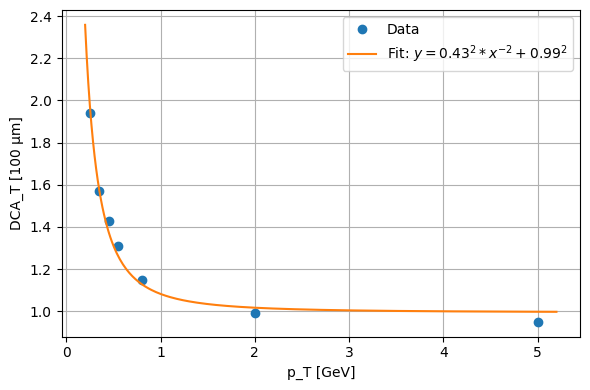

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your data points
xdata = np.array([0.25, 0.35, 0.45, 0.55, 0.8, 2.0, 5.0])
ydata = np.array([1.94, 1.57, 1.43, 1.31, 1.15, 0.99, 0.95])

# Define a power law model
def power_law(x, a, b, c):
    return (a**2 * x ** (-2+0*b)+c**2)**0.5

# Fit the model to the data
params, cov = curve_fit(power_law, xdata, ydata, p0=(0.1, 2,0.5))
a, b, c = params

# Print fit result
print(f"Fit result: y = {a:.3f}^2 * x^(-{b:.3f}) + {c:.3f}^2")
print(f"Fit result: y = {a**2:.3f} * x^(-{b:.3f}) + {c**2:.3f}")

# Plot
xfit = np.linspace(0.2, 5.2, 300)
yfit = power_law(xfit, a, b,c)

plt.figure(figsize=(6, 4))
plt.plot(xdata, ydata, 'o', label='Data')
plt.plot(xfit, yfit, '-', label=f'Fit: $y = {a:.2f}^2 * x^{{-{b:.0f}}}+{c:.2f}^2$')
plt.xlabel('p_T [GeV]')
plt.ylabel('DCA_T [100 μm]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Fit result: y = -0.0671 * pow(pt, -0.062) + 0.0655


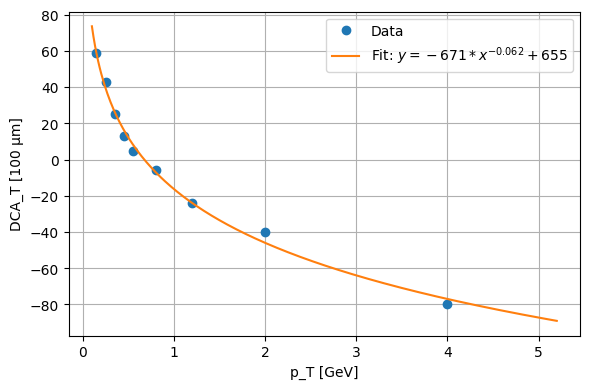

In [23]:
# Your data points
xdata = np.array([0.15,0.25, 0.35, 0.45, 0.55, 0.8, 1.2, 2.0, 4.0])
ydata = np.array([  59,  43,   25,   13,    5, -6,  -24, -40, -80])

# Define a power law model
def power_law(x, a, b, c):
    return a/x**b + c

# Fit the model to the data
params, cov = curve_fit(power_law, xdata, ydata, p0=(100, 0.1,1000))
a, b, c = params

# Print fit result
print(f"Fit result: y = {a/10000:.4f} * pow(pt, {b:.3f}) + {c/10000:.4f}")

# Plot
xfit = np.linspace(0.1, 5.2, 300)
yfit = power_law(xfit, a, b,c)

plt.figure(figsize=(6, 4))
plt.plot(xdata, ydata, 'o', label='Data')
plt.plot(xfit, yfit, '-', label=f'Fit: $y = {a:.0f} * x^{{{b:.3f}}}+{c:.0f}$')
plt.xlabel('p_T [GeV]')
plt.ylabel('DCA_T [100 μm]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()